In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#! wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

## Q1 Pandas version

In [3]:
pd.__version__

'1.2.1'

## Read in the data for the following questions

In [4]:
df = pd.read_csv('laptops.csv')

In [19]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [28]:
## Replace the spaces in the header with under score and make it to lower case
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [29]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


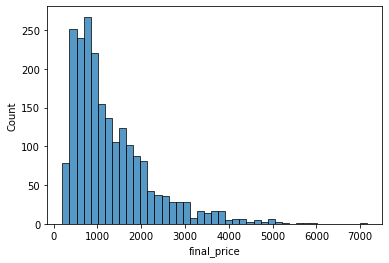

In [30]:
sns.histplot(df.final_price)

In [32]:
## Examine the data types of the data frame
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

## Q2 Records count

In [6]:
## Number of rows. Determine the shape of the matrix and get the number of row [0]
df.shape[0]

2160

## Q3 Laptop brands

In [33]:
### Count the number of laptop brands
len(list(df.brand.unique()))

27

## Q4 Missing values

In [34]:
## Select the number of columns with NA in the dataframe, turn into a list and determine the lenght of the list

len(list(df.isna().sum()[df.isna().sum() > 1]))

3

## Q5 Maximum final price

In [35]:
max(df[df.brand == "Dell"].final_price)

3936.0

## Q6 Median value of Screen

### Find the median value of Screen column in the dataset.

In [37]:
median_value_with_NA = df.screen.median()
print(median_value_with_NA)

15.6


### Next, calculate the most frequent value of the same Screen column.

In [38]:
most_common_size = df.screen.mode()
print(most_common_size[0])

15.6


### Use fillna method to fill the missing values in Screen column with the most frequent value from the previous step.

In [39]:
df.screen.fillna(most_common_size[0],inplace=True)

### Now, calculate the median value of Screen once again

In [40]:
df.isna().sum()

laptop             0
status             0
brand              0
model              0
cpu                0
ram                0
storage            0
storage_type      42
gpu             1371
screen             0
touch              0
final_price        0
dtype: int64

In [41]:
median_value_without_NA = df.screen.median()
print(median_value_without_NA)

15.6


## Q7 Sum of weights

1. Select all the "Innjoo" laptops from the dataset.
2. Select only columns RAM, Storage, Screen.
3. Get the underlying NumPy array. Let's call it X.
4. Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T. Let's call the result XTX.
5. Compute the inverse of XTX.
6. Create an array y with values [1100, 1300, 800, 900, 1000, 1100].
7. Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.
8. What's the sum of all the elements of the result?

In [43]:
## 1 and 2
Innjoo = df[df.brand == 'Innjoo'][["ram","storage","screen"]]

## 3
X = Innjoo.to_numpy()
## 4 and 5
XT = X.T
XTX = np.dot(XT, X)
## 6
XTX_inv = np.linalg.inv(XTX)


In [44]:
y = [1100, 1300, 800, 900, 1000, 1100]

In [45]:
w = np.dot(np.dot(XTX_inv,XT),y)

In [46]:
w

array([45.58076606,  0.42783519, 45.29127938])

In [47]:
w.sum()

91.2998806299555